In [5]:
from glob import glob
import os

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import classification_report, confusion_matrix

In [6]:
m = 1
diff1 = datetime.datetime.today() - datetime.timedelta(hours=5) - datetime.timedelta(days=m-1)
now1 = diff1.strftime("%d_%m_%Y_%H_%M_%S")
diff2 = datetime.datetime.today() - datetime.timedelta(hours=5) - datetime.timedelta(days=m)
now2 = diff2.strftime("%d_%m_%Y_%H_%M_%S")
now1, now2

('17_12_2021_12_41_33', '16_12_2021_12_41_33')

In [7]:
coins = ['ada', 'bch', 'btc', 'doge', 'dot', 'eos', 'etc', 'eth', 'link', 'ltc', 'sol', 'uni', 'xlm', 'xrp']
len(coins)

14

In [8]:
T1 = []
total1 = 0
D1 = {}
for i in coins:
    ds = pd.read_csv(f'Xs/round2/{i}.csv')
    ds = ds.drop_duplicates().dropna()
    D1[i] = [ds.shape[0]]
    T1.append(ds)
    total1+=ds.shape[0]
coin = 'all'

In [9]:
T2 = []
total2 = 0
for i in coins:
    ds = pd.read_csv(f'Xs/round1/{i}.csv')
    ds = ds.drop_duplicates().dropna()
    if i not in D1:
        D1[i] = [ds.shape[0]]
    else:
        D1[i].append(ds.shape[0])
    T2.append(ds)
    total2+=ds.shape[0]
coin = 'all'

In [10]:
D = {}
for i in D1:
    D[i] = [sum(D1[i]), round(100*sum(D1[i])/10172, 2)]
# D
# np.array(list(D.values())).sum()
D

{'ada': [496, 4.88],
 'bch': [506, 4.97],
 'btc': [1013, 9.96],
 'doge': [1207, 11.87],
 'dot': [525, 5.16],
 'eos': [561, 5.52],
 'etc': [676, 6.65],
 'eth': [1438, 14.14],
 'link': [472, 4.64],
 'ltc': [719, 7.07],
 'sol': [599, 5.89],
 'uni': [532, 5.23],
 'xlm': [645, 6.34],
 'xrp': [783, 7.7]}

In [11]:
total1+total2

10172

In [12]:
ds = pd.concat(T1+T2, axis=0).drop_duplicates()# [Cs]
print(ds.shape)
ds.head(3)

(8592, 54)


,target,n,diff1,diff2,media_rb_10,media_ra_10,media_rb_25,media_ra_25,media_rb_50,media_ra_50,...,outro_rb_10,outro_ra_10,outro_rb_25,outro_ra_25,outro_rb_50,outro_ra_50,outro_rb_100,outro_ra_100,outro_rb_250,outro_ra_250
0,1.0,5.0,0.685687,1.001049,0.470480,0.529520,0.519650,0.480350,0.493376,0.506624,...,0.449218,0.550782,0.509957,0.490043,0.524450,0.475550,0.489591,0.510409,0.472838,0.527162
1,0.0,4.0,0.128506,0.451285,0.486180,0.513820,0.477848,0.522152,0.521652,0.478348,...,0.425607,0.574393,0.484575,0.515425,0.523329,0.476671,0.513296,0.486704,0.481504,0.518496
2,1.0,6.0,0.209147,0.515755,0.443569,0.556431,0.471258,0.528742,0.504821,0.495179,...,0.511948,0.488052,0.501723,0.498277,0.505666,0.494334,0.487643,0.512357,0.469902,0.530098


In [13]:
ds.to_csv('fit.csv', sep="|", index=False)

In [14]:
!pip install polars

^C


In [15]:
import polars as pl

In [16]:
# %%timeit
dff = pl.read_csv('fit.csv', sep="|")
dff.head(3)

target,n,diff1,diff2,media_rb_10,media_ra_10,media_rb_25,media_ra_25,media_rb_50,media_ra_50,media_rb_100,media_ra_100,media_rb_250,media_ra_250,intro_rb_10,intro_ra_10,intro_rb_25,intro_ra_25,intro_rb_50,intro_ra_50,intro_rb_100,intro_ra_100,intro_rb_250,intro_ra_250,adagio_rb_10,adagio_ra_10,adagio_rb_25,adagio_ra_25,adagio_rb_50,adagio_ra_50,adagio_rb_100,adagio_ra_100,adagio_rb_250,adagio_ra_250,scherzo_rb_10,scherzo_ra_10,scherzo_rb_25,scherzo_ra_25,scherzo_rb_50,scherzo_ra_50,scherzo_rb_100,scherzo_ra_100,scherzo_rb_250,scherzo_ra_250,outro_rb_10,outro_ra_10,outro_rb_25,outro_ra_25,outro_rb_50,outro_ra_50,outro_rb_100,outro_ra_100,outro_rb_250,outro_ra_250
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,5,0.6856869460112844,1.001049487365802,0.4704796779994834,0.5295203220005166,0.5196503629768042,0.4803496370231959,0.4933758135269334,0.5066241864730665,0.4998428145331887,0.5001571854668112,0.4793328882307726,0.5206671117692273,0.4732292428270033,0.5267707571729967,0.5358615538911147,0.4641384461088854,0.4942470265424454,0.5057529734575547,0.5201161640872413,0.4798838359127587,0.4870317355561229,0.512968264443877,0.4654431225151827,0.5345568774848173,0.5321340298559532,0.4678659701440469,0.4967854193489297,0.5032145806510704,0.511472616311644,0.488527383688356,0.4847287766636318,0.5152712233363681,0.4654898007213599,0.5345101992786402,0.5253311229659019,0.4746688770340982,0.4876083003520912,0.5123916996479089,0.5027038546956154,0.4972961453043845,0.4818188240151639,0.5181811759848362,0.4492180156835709,0.550781984316429,0.5099571028778273,0.4900428971221727,0.5244503095124202,0.4755496904875797,0.4895911257489075,0.5104088742510926,0.4728376791329184,0.5271623208670816
0.0,4,0.1285062828742299,0.4512853574018897,0.486180229612886,0.513819770387114,0.4778482916568053,0.5221517083431946,0.5216524593892996,0.4783475406107005,0.5054520225893694,0.4945479774106306,0.4688374737378573,0.5311625262621427,0.5578916550372557,0.4421083449627443,0.545547911850598,0.4544520881494019,0.5446301669475114,0.4553698330524885,0.5325044484555062,0.4674955515444938,0.4783227188638812,0.5216772811361188,0.5430842743505022,0.4569157256494978,0.5235614872782894,0.4764385127217104,0.5416535007306664,0.4583464992693337,0.5157795255432334,0.4842204744567667,0.4657797367141432,0.5342202632858568,0.5430842743505022,0.4569157256494978,0.5235614872782894,0.4764385127217104,0.5416535007306664,0.4583464992693337,0.5157795255432334,0.4842204744567667,0.4657797367141432,0.5342202632858568,0.4256069519304032,0.5743930480695968,0.484574574687253,0.5154254253127468,0.5233288080122969,0.476671191987703,0.5132962134638227,0.4867037865361774,0.481504040583556,0.518495959416444
1,6,0.2091472500389798,0.5157546941735985,0.4435691588850381,0.5564308411149619,0.4712580172489571,0.5287419827510428,0.504821178031766,0.495178821968234,0.51391054659404,0.4860894534059599,0.4763677981084193,0.5236322018915808,0.521992272489581,0.478007727510419,0.4609867607252231,0.539013239274777,0.516420828111342,0.4835791718886579,0.5039116050028138,0.4960883949971861,0.4787703130275467,0.5212296869724532,0.4572876973624026,0.5427123026375974,0.4608759606757471,0.5391240393242529,0.5069707574644434,0.4930292425355565,0.5083635872383463,0.4916364127616537,0.4767098447171674,0.5232901552828326,0.4333874001912947,0.5666125998087053,0.4642278259008756,0.5357721740991244,0.5060214686759021,0.4939785313240978,0.5252700808017422,0.4747299191982578,0.4792996149158197,0.5207003850841803,0.5119481900139791,0.488051809986021,0.5017234138928321,0.4982765861071679,0.5056656323465989,0.494334367653401,0.4876432328928991,0.512356767107101,0.4699019862265382,0.5300980137734618


In [85]:
%%timeit
dff2 = pd.read_csv('fit.csv', sep="|")
dff2.head(3)

154 ms ± 8.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [86]:
%%timeit
pl.read_csv('fit.csv', sep="|")

17.2 ms ± 821 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [87]:
%%timeit
pd.read_csv('fit.csv', sep="|")

156 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [92]:
pl.read_csv('fit.csv', sep="|").shape

(8592, 54)

In [91]:
pd.read_csv('fit.csv', sep="|")

,target,n,diff1,diff2,media_rb_10,media_ra_10,media_rb_25,media_ra_25,media_rb_50,media_ra_50,...,outro_rb_10,outro_ra_10,outro_rb_25,outro_ra_25,outro_rb_50,outro_ra_50,outro_rb_100,outro_ra_100,outro_rb_250,outro_ra_250
0,1.0,5.0,0.685687,1.001049,0.470480,0.529520,0.519650,0.480350,0.493376,0.506624,...,0.449218,0.550782,0.509957,0.490043,0.524450,0.475550,0.489591,0.510409,0.472838,0.527162
1,0.0,4.0,0.128506,0.451285,0.486180,0.513820,0.477848,0.522152,0.521652,0.478348,...,0.425607,0.574393,0.484575,0.515425,0.523329,0.476671,0.513296,0.486704,0.481504,0.518496
2,1.0,6.0,0.209147,0.515755,0.443569,0.556431,0.471258,0.528742,0.504821,0.495179,...,0.511948,0.488052,0.501723,0.498277,0.505666,0.494334,0.487643,0.512357,0.469902,0.530098
3,0.0,12.0,0.599657,0.861375,0.508034,0.491966,0.529698,0.470302,0.530942,0.469058,...,0.495487,0.504513,0.541184,0.458816,0.526720,0.473280,0.521646,0.478354,0.484501,0.515499
4,0.0,8.0,0.317459,0.895475,0.500690,0.499310,0.522533,0.477467,0.500027,0.499973,...,0.552423,0.447577,0.535508,0.464492,0.516472,0.483528,0.463820,0.536180,0.494962,0.505038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,0.0,6.0,0.248768,0.501108,0.489939,0.510061,0.474301,0.525699,0.449590,0.550410,...,0.490054,0.509946,0.476735,0.523265,0.495415,0.504585,0.497075,0.502925,0.543453,0.456547
8588,0.0,6.0,0.170283,0.484590,0.495778,0.504222,0.502561,0.497439,0.480863,0.519137,...,0.539080,0.460920,0.502883,0.497117,0.502738,0.497262,0.508028,0.491972,0.540492,0.459508
8589,0.0,4.0,0.158410,0.514713,0.506404,0.493596,0.480440,0.519560,0.453908,0.546092,...,0.443461,0.556539,0.539887,0.460113,0.504427,0.495573,0.504975,0.495025,0.562710,0.437290
8590,1.0,5.0,0.287708,0.448780,0.494068,0.505932,0.526214,0.473786,0.556506,0.443494,...,0.470386,0.529614,0.512193,0.487807,0.560276,0.439724,0.528938,0.471062,0.571375,0.428625


In [112]:
dj = pl.DataFrame(x_train, columns=dff.columns[1:])
dj.shape

(6444, 53)

In [113]:
dj.to_csv('scaler.csv', sep="|")

In [82]:
dff.to_csv('fit2.txt', sep="|")

In [41]:
ds.groupby('n').size()

n
4.0     2128
5.0     1707
6.0     1392
7.0      974
8.0      665
9.0      535
10.0     356
11.0     246
12.0     179
13.0     124
14.0      78
15.0      65
16.0      38
17.0      15
18.0      35
19.0      12
20.0      15
21.0       5
22.0       7
23.0       4
24.0       4
25.0       2
26.0       1
27.0       1
28.0       1
29.0       1
33.0       1
36.0       1
dtype: int64

In [148]:
t0.groupby('n').size().to_frame().T

n,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,33.0,36.0
0,1069,822,683,449,362,238,178,117,84,39,...,2,4,2,1,1,1,1,1,1,1


In [149]:
t1.groupby('n').size().to_frame().T

n,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,24.0,25.0
0,1059,885,709,525,303,297,178,129,95,85,...,35,17,10,22,5,10,2,5,2,1


In [43]:
t1 = ds[ds.target==1]
t0 = ds[ds.target==0]

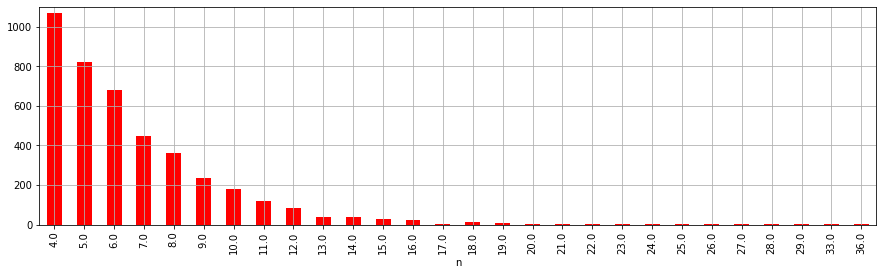

In [144]:
t0.groupby('n').size().plot(kind='bar', figsize=(15, 4), color='red')
plt.ylim(0, 1100)
plt.grid()

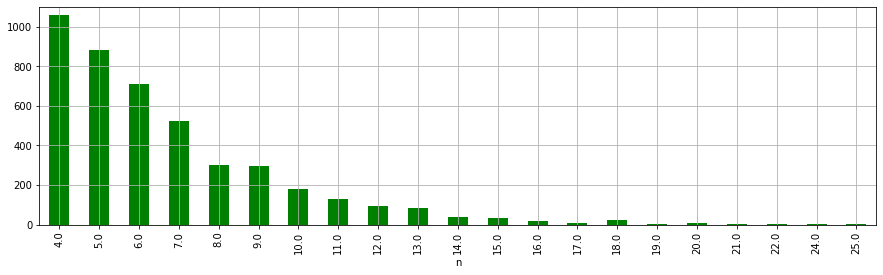

In [145]:
t1.groupby('n').size().plot(kind='bar', figsize=(15, 4), color='green')
plt.ylim(0, 1100)
plt.grid()

In [19]:
X = ds.drop(columns=['target']).values
Y = ds.target.values
Y

array([1., 0., 1., ..., 0., 1., 0.])

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X.astype(np.float64), Y, test_size = 0.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6444, 53), (2148, 53), (6444,), (2148,))

In [21]:
x_train.shape

(6444, 53)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)  

In [24]:
x_train.shape

(6444, 53)

In [25]:
x_train

array([[-0.22211645, -0.06824178, -0.24778077, ..., -0.27821533,
        -0.05584324,  0.05584324],
       [-0.22211645, -0.76926734, -0.87002869, ..., -0.86623909,
         0.67087831, -0.67087831],
       [-0.90143225,  0.06807145,  1.31517579, ...,  0.90645155,
         0.56101188, -0.56101188],
       ...,
       [ 0.45719936, -0.34470234, -0.2523365 , ...,  0.10337937,
         0.92829624, -0.92829624],
       [ 0.79685726, -0.14828412, -0.20266747, ...,  1.617231  ,
        -0.20057682,  0.20057682],
       [ 1.13651516,  0.3276959 ,  0.58811713, ...,  0.15466184,
        -0.42653171,  0.42653171]])

In [94]:
x_train.shape

(6444, 53)

In [71]:
x_train

array([[-0.22211645, -0.06824178, -0.24778077, ..., -0.27821533,
        -0.05584324,  0.05584324],
       [-0.22211645, -0.76926734, -0.87002869, ..., -0.86623909,
         0.67087831, -0.67087831],
       [-0.90143225,  0.06807145,  1.31517579, ...,  0.90645155,
         0.56101188, -0.56101188],
       ...,
       [ 0.45719936, -0.34470234, -0.2523365 , ...,  0.10337937,
         0.92829624, -0.92829624],
       [ 0.79685726, -0.14828412, -0.20266747, ...,  1.617231  ,
        -0.20057682,  0.20057682],
       [ 1.13651516,  0.3276959 ,  0.58811713, ...,  0.15466184,
        -0.42653171,  0.42653171]])

In [58]:
x_train

array([[-0.22211645, -0.06824178, -0.24778077, ..., -0.27821533,
        -0.05584324,  0.05584324],
       [-0.22211645, -0.76926734, -0.87002869, ..., -0.86623909,
         0.67087831, -0.67087831],
       [-0.90143225,  0.06807145,  1.31517579, ...,  0.90645155,
         0.56101188, -0.56101188],
       ...,
       [ 0.45719936, -0.34470234, -0.2523365 , ...,  0.10337937,
         0.92829624, -0.92829624],
       [ 0.79685726, -0.14828412, -0.20266747, ...,  1.617231  ,
        -0.20057682,  0.20057682],
       [ 1.13651516,  0.3276959 ,  0.58811713, ...,  0.15466184,
        -0.42653171,  0.42653171]])

In [59]:
x_train.shape[0]*0.1

644.4000000000001

In [13]:
from tensorflow.keras import activations

In [30]:
# activations.hard_sigmoid([1])

In [2]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(53, activation='hard_sigmoid', input_shape=(53,)))
model.add(Dense(53, activation='sigmoid'))
model.add(Dense(53, activation='tanh'))
model.add(Dense(53, activation='linear'))
model.add(Dense(53, activation='relu'))

# model.add(Dense(106, activation='hard_sigmoid'))
# model.add(Dense(159, activation='hard_sigmoid'))
# model.add(Dense(212, activation='hard_sigmoid'))
# model.add(Dense(2, activation='hard_sigmoid'))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 112)               12656     
_________________________________________________________________
dense_7 (Dense)              (None, 112)               12656     
_________________________________________________________________
dense_8 (Dense)              (None, 112)               12656     
_________________________________________________________________
dense_9 (Dense)              (None, 112)               12656     
_________________________________________________________________
dense_10 (Dense)             (None, 112)               12656     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 113       
Total params: 63,393
Trainable params: 63,393
Non-trainable params: 0
__________________________________________________

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
hist = model.fit(x_train, y_train,
          epochs=50,
          validation_data=(x_test, y_test),
          verbose=1)

Epoch 1/50
202/202 [==============================] - 3s 5ms/step - loss: 0.6959 - accuracy: 0.5005 - val_loss: 0.6909 - val_accuracy: 0.5042
Epoch 2/50
202/202 [==============================] - 1s 3ms/step - loss: 0.6878 - accuracy: 0.5386 - val_loss: 0.6693 - val_accuracy: 0.5102
Epoch 3/50
202/202 [==============================] - 1s 3ms/step - loss: 0.4985 - accuracy: 0.7588 - val_loss: 0.3290 - val_accuracy: 0.8580
Epoch 4/50
202/202 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8681 - val_loss: 0.2599 - val_accuracy: 0.8929
Epoch 5/50
202/202 [==============================] - 1s 3ms/step - loss: 0.2728 - accuracy: 0.8866 - val_loss: 0.2399 - val_accuracy: 0.9069
Epoch 6/50
202/202 [==============================] - 1s 3ms/step - loss: 0.2682 - accuracy: 0.8876 - val_loss: 0.2468 - val_accuracy: 0.8957
Epoch 7/50
202/202 [==============================] - 1s 3ms/step - loss: 0.2369 - accuracy: 0.9077 - val_loss: 0.2235 - val_accuracy: 0.9125
Epoch 

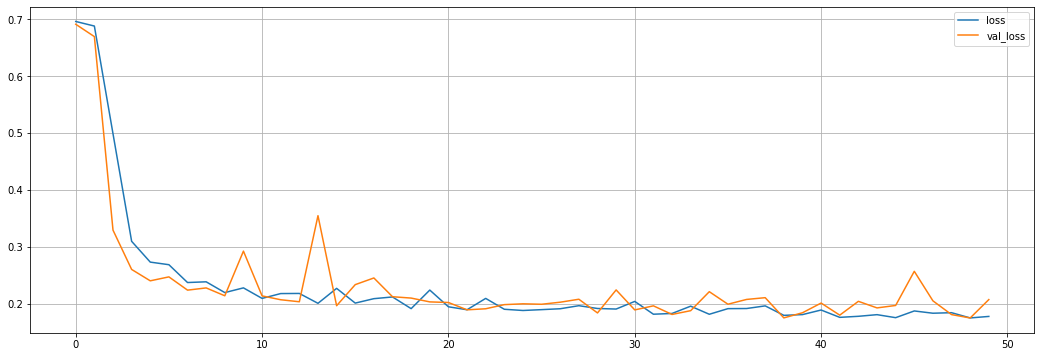

In [20]:
plt.figure(figsize=(18, 6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()

In [22]:
score = model.evaluate(x_test, y_test,verbose=1)
print(score)

68/68 [==============================] - 0s 1ms/step - loss: 0.2069 - accuracy: 0.9139
[0.20689238607883453, 0.9138733744621277]


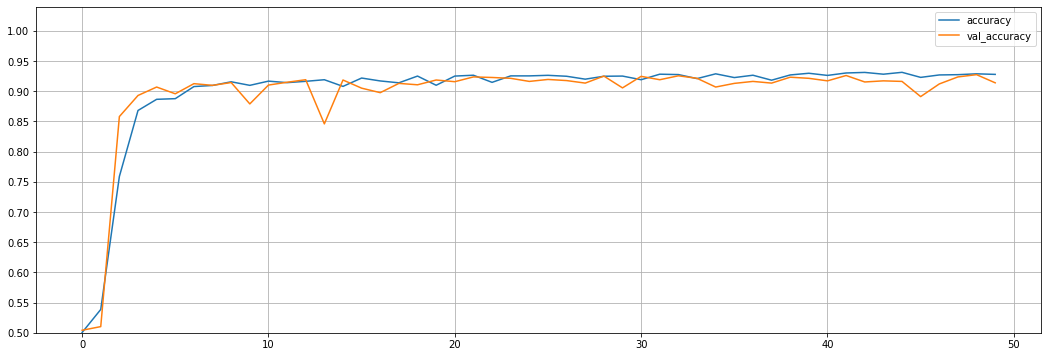

In [21]:
plt.figure(figsize=(18, 6))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.yticks([i/20 for i in range(0, 21)])
plt.ylim([0.5, 1.04])
plt.grid()

In [3]:
from keras.models import load_model
loaded_model = load_model('model.h5')

In [70]:
score = loaded_model.evaluate(x_test, y_test,verbose=1)
print(score)

68/68 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.9344
[0.17624033987522125, 0.9343575239181519]


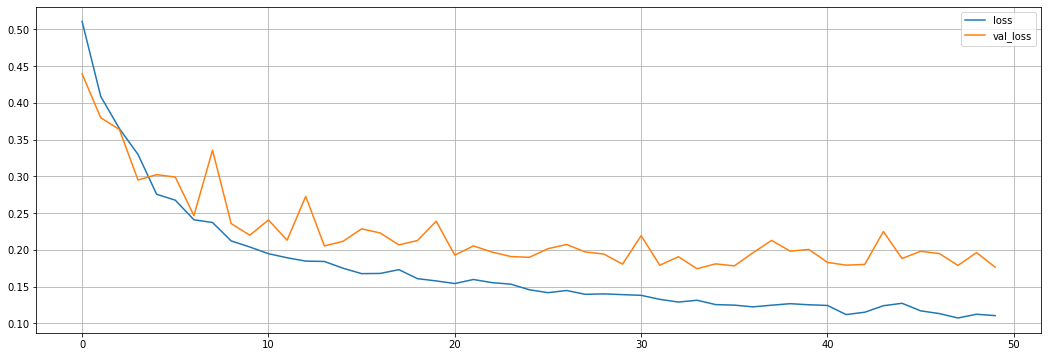

In [163]:
plt.figure(figsize=(18, 6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()

In [178]:
score = model.evaluate(x_test, y_test,verbose=1)
print(score)

68/68 [==============================] - 0s 1ms/step - loss: 0.1762 - accuracy: 0.9344
[0.17624033987522125, 0.9343575239181519]


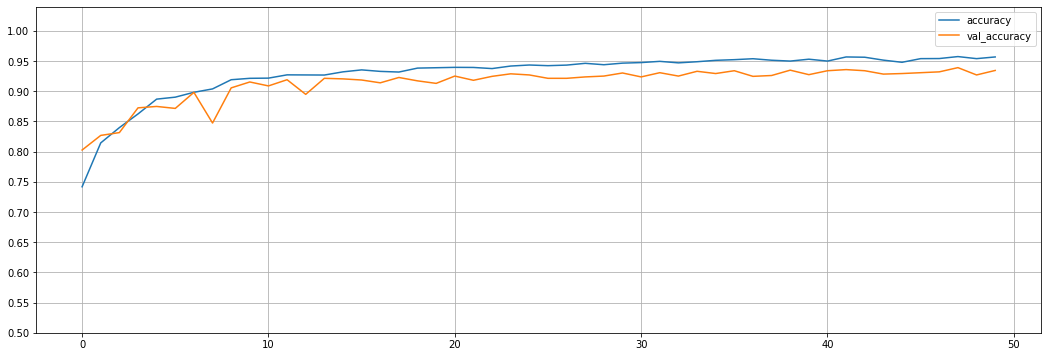

In [177]:
plt.figure(figsize=(18, 6))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.yticks([i/20 for i in range(0, 21)])
plt.ylim([0.5, 1.04])
plt.grid()

In [178]:
score = model.evaluate(x_test, y_test,verbose=1)
print(score)

68/68 [==============================] - 0s 1ms/step - loss: 0.1762 - accuracy: 0.9344
[0.17624033987522125, 0.9343575239181519]


In [4]:
y_pred = loaded_model.predict(x_test)
y_pred

NameError: name 'x_test' is not defined

In [2]:
y_pred = loaded_model.predict(x_test)
y_pred

NameError: name 'loaded_model' is not defined

In [64]:
x_test

array([[-0.22211645, -0.26224382, -0.44752124, ..., -0.1216477 ,
        -0.62519231,  0.62519231],
       [-0.56177435, -0.61992345, -0.5852763 , ...,  0.06726921,
        -0.56575693,  0.56575693],
       [-0.22211645, -0.39060675, -0.66820686, ..., -1.1586178 ,
        -0.41976637,  0.41976637],
       ...,
       [-0.90143225, -0.64194132, -0.79043057, ..., -0.24518458,
         0.19522531, -0.19522531],
       [-0.56177435,  0.00824858, -0.26819601, ..., -0.69667398,
        -0.36106043,  0.36106043],
       [ 1.47617306, -0.28099843, -0.59507453, ..., -1.4825182 ,
         1.7195725 , -1.7195725 ]])

In [184]:
y_pred[y_pred>.8]

array([0.98543155, 0.9958172 , 0.9999998 , 0.99948716, 0.9596305 ,
       0.82390845, 0.9816687 , 0.91542995, 0.9999989 , 0.999756  ,
       0.9907592 , 1.        , 0.9998847 , 0.81942844, 0.99977005,
       0.99974823, 0.9999909 , 0.9999928 , 0.999568  , 0.9974463 ,
       0.9239893 , 0.9999993 , 0.9997288 , 0.99999905, 0.9771321 ,
       1.        , 0.99918425, 0.9997686 , 0.99936813, 0.99930716,
       0.9998728 , 0.91941684, 0.99198675, 0.99999666, 0.999671  ,
       0.9999988 , 0.98346126, 0.9999994 , 0.9999908 , 0.9992434 ,
       0.9998606 , 0.9999243 , 0.9999929 , 0.82809126, 0.99985886,
       0.98314816, 0.9986522 , 0.97375476, 0.9989716 , 0.9959314 ,
       0.9998936 , 0.9999625 , 0.9271519 , 0.99885714, 0.999194  ,
       0.98327315, 0.99990296, 0.99782455, 0.9988439 , 0.9999983 ,
       0.9977509 , 0.9999968 , 0.98851204, 0.9995245 , 0.99905926,
       0.99999976, 0.99999166, 0.98798835, 0.99999475, 0.98850054,
       0.9994979 , 0.9919682 , 0.99910045, 0.99966884, 0.99134

In [187]:
y_pred[y_pred<.2].astype(np.str_)

array(['0.00033670664', '0.012603968', '0.028663069', '0.06542584',
       '0.04782158', '0.003060311', '0.0039706826', '0.10986549',
       '0.0034625232', '0.034770012', '0.113627285', '0.06737241',
       '0.1672048', '0.06357378', '0.011994988', '0.0465298',
       '0.060948968', '0.011098176', '0.0387699', '0.011106074',
       '0.001793623', '0.015811116', '0.049483955', '0.007883638',
       '0.07257146', '0.059329122', '0.059126467', '0.011505187',
       '0.0021202266', '0.038913578', '0.007192999', '0.077563316',
       '0.007987171', '0.0062491596', '0.00955531', '0.00031891465',
       '0.010849595', '0.02548173', '0.0026882887', '0.00047641993',
       '0.023228228', '0.03330949', '0.10633269', '0.16591504',
       '0.008866608', '0.00023663044', '0.010852337', '0.0115760565',
       '0.00073093176', '0.0029508173', '0.06459075', '0.0044564903',
       '0.020943373', '0.010932028', '0.04352534', '0.015317649',
       '0.0017820895', '0.110985965', '0.01927033', '0.03366816

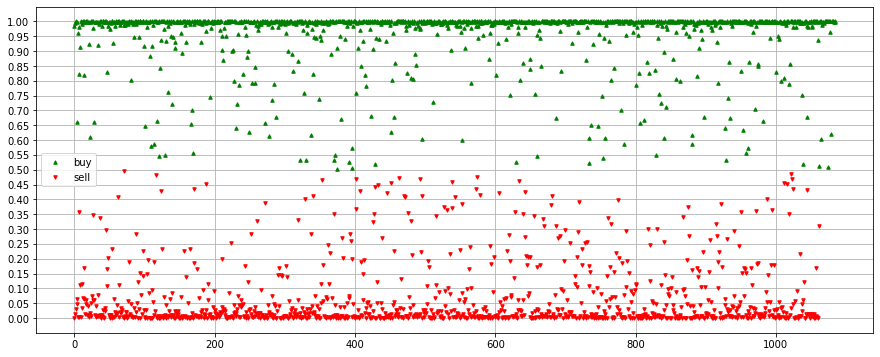

In [228]:
plt.figure(figsize=(15, 6))
plt.plot(y_pred[y_pred>=.5], "^", c='g', markersize=3.5)
plt.plot(y_pred[y_pred<.5], "v", c='r', markersize=3.5)
plt.yticks([i/20 for i in range(0, 21)])
plt.legend(['buy', 'sell'])
plt.grid()

In [181]:
y_test

array([1., 1., 1., ..., 1., 1., 1.])

In [179]:
model.save('model.h5')

In [26]:
from keras.models import load_model, Model

In [27]:
loaded_model = load_model('model.h5')

In [217]:
%%timeit
loaded_model.predict(x_test)

92.9 ms ± 8.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
%%timeit
loaded_model.predict(x_test[0].reshape(1, 53))

40.5 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [44]:
%%timeit
loaded_model.predict(x_test[0].reshape(1, 53)), loaded_model.predict(x_test[0].reshape(1, 53))

83.7 ms ± 9.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [39]:
loaded_model.predict(x_test[0].reshape(1, 53))

array([[0.98543155]], dtype=float32)

In [206]:
x_test.shape

(2148, 53)

In [207]:
x_test[0].shape

(53,)

In [210]:
np.array(x_test[0]).shape

(53,)

In [229]:
import keras
keras.__version__

'2.6.0'